<a href="https://colab.research.google.com/github/ZefraAlseif/Project1_Wine_Network/blob/main/ClassificationModel_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adapting the original wine data to a regression model and classification model

In [3]:
#@title Data as Numpy Arrays
import matplotlib.pyplot as plt
import numpy as np
# This time we need to also import pandas
import pandas as pd
from io import StringIO

# Read in white wine data
# Uses PANDAS (pd) to create a PANDAS DataFrame Object:
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep = ';')

# Read in red wine data
# Uses PANDAS (pd) to create a PANDAS DataFrame Object:
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep =';')

red['type'] = 1
white['type'] = 0

wines = red.append(white, ignore_index = True)

# Import SKLEARN
import sklearn

# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split
# Specify the data -
X1 = wines.iloc[:, 0:11]
X2 = wines.iloc[:,12]
X = pd.concat([X1,X2],axis = 1)

y = np.ravel(wines.quality)

# Splitting the data set for training and validating - Done with SKLEARN
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.25, random_state = 45)

# Converting X_train & X_test DataFrame s to TF sensors
# Will use NumPy, TF, & Keras after this
# import tensorflow as tf

Xtrain = X_train.to_numpy()
X_valid = X_valid.to_numpy()

X_valid
# In reality:
# [1] ALL THE Xtrain patterns (with their y_train targets)
# will be used for TRAINING ([TR]), as Xtrain & y_train
# [2] MOST OF THE X_valid patterns (and their y_valid targets)
# will be used for VALIDATION ([TT]), as X_val & y_val
# BUT WE WILL SET ASIDE THE LAST 10 for "testing" ([TS])
# as X_tst & y_tst

# Retain the first 1615 patterns for validation ([TT])
Xval = X_valid[:1615]
Xval.shape

# and now set aside the last 10 for test
Xtst = X_valid[1615:]
Xtst.shape

# Same for the corresponding targets
# Retain the first 1615 for validation ([TT])
y_val = y_valid[:1615]
y_val.shape

y_tst = y_valid[1615:]
y_tst.shape 
y_tst

# Now, in addition, create the targets as one-hot-encoded 4 quality levels
# We will track these few targets through the conversion process
y_train[272:283]

# Function create rank-1 arrays where 3,4,5,6,7,8,9 are mapped to 1 or 2 or 3 or 4 
def to_4cs(x):
  lx = len(x)
  results = np.zeros(lx)
  for i in range(lx):
    # print("start")
    xa = x[i];
    if xa <= 3:
      results[i] = 1
    elif xa <= 6:
      results[i] = 2
    elif xa <= 8:
      results[i] = 3
    else:
      results[i] = 4
    # results [i, label] = 1
  results = results.astype(int)
  return results

train_labels = to_4cs(y_train)
val_labels = to_4cs(y_val)
tst_labels = to_4cs(y_tst)

# Let's verify that the training targets that we are tracking 
# were converted to levels (1 = BAD; 2 = Medium; 3 = GOOD; 4- Excellent) correctly:
train_labels[272:283]

# Now, one shot encoding of all 3 target arrays
# define a function to do the 

def to_one_hot(labels, dimension = 4):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels-1):
    results[i, label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_val_labels = to_one_hot(val_labels)
one_hot_tst_labels = to_one_hot(tst_labels)

#Let's verify that the training targets we have tracked were
# one-hot encoded correctly
Xtrain.shape

# SO, AFTER EXECUTING THIS CELL, YOU WILL HAVE:
# FOR TRAINING:
# Xtrain (4872, 12)...y_train (4872,)...train_labels(4872,)....one_hot_train_labels (4872,4)
# FOR VALIDATING:
# Xval (1615, 12)...y_val (1615,)...val_labels(1615,)...one_hot_val_labels (1615,4)
# FOR TESTING:
# Xtst (10, 12)...y_tst (10,)...tst_labels(10,)... one_hot_tst_labels (10,4)
# PLEASE DO NOT CHANGE THE NAMES OF THESE VARIABLES (So that instructor can use them)


(4872, 12)

# III.0 Estimating

In [13]:
import copy
one_hot_val_labels_copy = copy.copy(one_hot_val_labels)
np.random.shuffle(one_hot_val_labels_copy)
hits_array = np.array(one_hot_val_labels) == np.array(one_hot_val_labels_copy)
print("Accuracy using one_hot_val_labels as set: ",hits_array.mean())
val_labels_copy = copy.copy(val_labels)
np.random.shuffle(val_labels_copy)
hits_array = np.array(val_labels) == np.array(val_labels_copy)
print("Accuracy using val_labels as set: ",hits_array.mean())

Accuracy using one_hot_val_labels as set:  0.8303405572755418
Accuracy using val_labels as set:  0.6551083591331269


# III.1 Classification Model 1 (clasmodl1)

In [11]:
from keras.engine.input_layer import Input
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_clasmodl1():
  clasmodl1 = keras.Sequential(
      [
        layers.Dense(8, activation = 'relu'),
        layers.Dense(4, activation = 'softmax')
      ]
)
  clasmodl1.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])
  return clasmodl1

clasmodl1 = build_clasmodl1()
history_clasmodl1 = clasmodl1.fit(x = Xtrain,y = one_hot_train_labels, batch_size = 32, epochs = 50, verbose = 2, validation_data = (Xval,one_hot_val_labels), validation_freq = 1)

clasmodl1.summary()

Epoch 1/50
153/153 - 2s - loss: 2.9214 - accuracy: 0.5115 - val_loss: 0.4823 - val_accuracy: 0.7009 - 2s/epoch - 13ms/step
Epoch 2/50
153/153 - 1s - loss: 0.3918 - accuracy: 0.7878 - val_loss: 0.3970 - val_accuracy: 0.7437 - 606ms/epoch - 4ms/step
Epoch 3/50
153/153 - 1s - loss: 0.3205 - accuracy: 0.7950 - val_loss: 0.3211 - val_accuracy: 0.7839 - 537ms/epoch - 4ms/step
Epoch 4/50
153/153 - 1s - loss: 0.2846 - accuracy: 0.7997 - val_loss: 0.3035 - val_accuracy: 0.7659 - 583ms/epoch - 4ms/step
Epoch 5/50
153/153 - 1s - loss: 0.2658 - accuracy: 0.8001 - val_loss: 0.2749 - val_accuracy: 0.7765 - 711ms/epoch - 5ms/step
Epoch 6/50
153/153 - 1s - loss: 0.2561 - accuracy: 0.8013 - val_loss: 0.2839 - val_accuracy: 0.7678 - 862ms/epoch - 6ms/step
Epoch 7/50
153/153 - 0s - loss: 0.2501 - accuracy: 0.8028 - val_loss: 0.3170 - val_accuracy: 0.6923 - 362ms/epoch - 2ms/step
Epoch 8/50
153/153 - 0s - loss: 0.2459 - accuracy: 0.7986 - val_loss: 0.3520 - val_accuracy: 0.5573 - 271ms/epoch - 2ms/step
Ep

## Plots of Classification Model 1 and Final Values

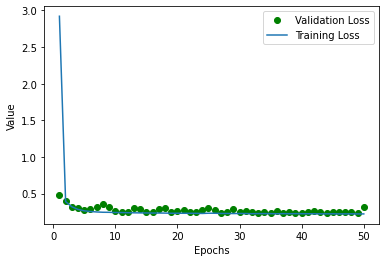

Final Training loss:  0.22341936826705933 
Final Training Accuracy:  0.8045976758003235
Final Validation loss:  0.3152875006198883 
Final Validation Accuracy:  0.6798761487007141


In [12]:
# Plot the validation and training loss
plt.plot(range(1, len(history_clasmodl1.history['val_loss']) + 1), history_clasmodl1.history['val_loss'], 'go', label = "Validation Loss")
plt.plot(range(1, len(history_clasmodl1.history['loss']) + 1), history_clasmodl1.history['loss'],label = "Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend()
plt.show()
# Final Values
print("Final Training loss: ",history_clasmodl1.history['loss'][-1],"\nFinal Training Accuracy: ", history_clasmodl1.history['accuracy'][-1])
print("Final Validation loss: ",history_clasmodl1.history['val_loss'][-1],"\nFinal Validation Accuracy: ", history_clasmodl1.history['val_accuracy'][-1])

# III.2 Classification Model 2 (clasmodl2)

In [7]:
from keras.engine.input_layer import Input
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_clasmodl2():
  clasmodl2 = keras.Sequential(
      [
        layers.Dense(512, activation = 'relu'),
        layers.Dense(100, activation = 'relu'),
        layers.Dense(30, activation = 'relu'),
        layers.Dense(100, activation = 'relu'),
        layers.Dense(4, activation = 'softmax')
      ]
)
  clasmodl2.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])
  return clasmodl2

clasmodl2 = build_clasmodl2()
history_clasmodl2 = clasmodl2.fit(x = Xtrain,y = one_hot_train_labels, batch_size = 128, epochs = 200, verbose = 2, validation_data = (Xval,one_hot_val_labels), validation_freq = 1)

#clasmodl2.summary()

Epoch 1/200
39/39 - 1s - loss: 0.3260 - accuracy: 0.7911 - val_loss: 0.3188 - val_accuracy: 0.7839 - 1s/epoch - 35ms/step
Epoch 2/200
39/39 - 0s - loss: 0.2790 - accuracy: 0.8013 - val_loss: 0.3093 - val_accuracy: 0.7839 - 202ms/epoch - 5ms/step
Epoch 3/200
39/39 - 0s - loss: 0.2677 - accuracy: 0.8036 - val_loss: 0.3559 - val_accuracy: 0.7839 - 220ms/epoch - 6ms/step
Epoch 4/200
39/39 - 0s - loss: 0.2601 - accuracy: 0.8017 - val_loss: 0.2951 - val_accuracy: 0.7839 - 239ms/epoch - 6ms/step
Epoch 5/200
39/39 - 0s - loss: 0.2501 - accuracy: 0.8038 - val_loss: 0.3559 - val_accuracy: 0.7288 - 243ms/epoch - 6ms/step
Epoch 6/200
39/39 - 0s - loss: 0.2524 - accuracy: 0.8013 - val_loss: 0.3187 - val_accuracy: 0.7839 - 258ms/epoch - 7ms/step
Epoch 7/200
39/39 - 0s - loss: 0.2513 - accuracy: 0.8042 - val_loss: 0.2785 - val_accuracy: 0.7839 - 222ms/epoch - 6ms/step
Epoch 8/200
39/39 - 0s - loss: 0.2473 - accuracy: 0.8038 - val_loss: 0.2691 - val_accuracy: 0.7839 - 219ms/epoch - 6ms/step
Epoch 9/20

## Plots of Classification Model 2 and Final Values

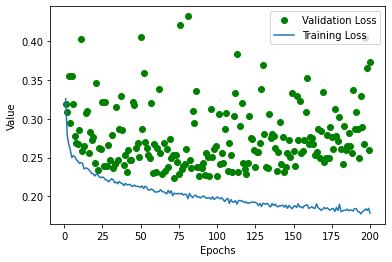

Final Training loss:  0.17825034260749817 
Final Training Accuracy:  0.8417487740516663
Final Validation loss:  0.374043732881546 
Final Validation Accuracy:  0.7876160740852356


In [8]:
# Plot the validation and training loss
plt.plot(range(1, len(history_clasmodl2.history['val_loss']) + 1), history_clasmodl2.history['val_loss'], 'go', label = "Validation Loss")
plt.plot(range(1, len(history_clasmodl2.history['loss']) + 1), history_clasmodl2.history['loss'],label = "Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend()
plt.show()
# Final Values
print("Final Training loss: ",history_clasmodl2.history['loss'][-1],"\nFinal Training Accuracy: ", history_clasmodl2.history['accuracy'][-1])
print("Final Validation loss: ",history_clasmodl2.history['val_loss'][-1],"\nFinal Validation Accuracy: ", history_clasmodl2.history['val_accuracy'][-1])

# III.3 Classification Model 3 (clasmodl3)

In [4]:
from keras.engine.input_layer import Input
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_clasmodl3():
  clasmodl3 = keras.Sequential(
      [
        layers.Dense(512, activation = 'relu'),
        layers.Dense(100, activation = 'relu'),
        layers.Dense(30, activation = 'relu'),
        layers.Dense(100, activation = 'relu'),
        layers.Dense(4, activation = 'softmax')
      ]
)
  clasmodl3.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])
  return clasmodl3

clasmodl3 = build_clasmodl3()
history_clasmodl3 = clasmodl3.fit(x = Xtrain,y = one_hot_train_labels, batch_size = 128, epochs = 50, verbose = 2, validation_data = (Xval,one_hot_val_labels), validation_freq = 1)

#clasmodl3.summary()

Epoch 1/50
39/39 - 2s - loss: 0.3735 - accuracy: 0.7535 - val_loss: 0.2831 - val_accuracy: 0.7839 - 2s/epoch - 39ms/step
Epoch 2/50
39/39 - 0s - loss: 0.2646 - accuracy: 0.8038 - val_loss: 0.2835 - val_accuracy: 0.7839 - 214ms/epoch - 5ms/step
Epoch 3/50
39/39 - 0s - loss: 0.2587 - accuracy: 0.8038 - val_loss: 0.4180 - val_accuracy: 0.7839 - 234ms/epoch - 6ms/step
Epoch 4/50
39/39 - 0s - loss: 0.2585 - accuracy: 0.8038 - val_loss: 0.2839 - val_accuracy: 0.7839 - 258ms/epoch - 7ms/step
Epoch 5/50
39/39 - 0s - loss: 0.2586 - accuracy: 0.8038 - val_loss: 0.2855 - val_accuracy: 0.7839 - 225ms/epoch - 6ms/step
Epoch 6/50
39/39 - 0s - loss: 0.2497 - accuracy: 0.8038 - val_loss: 0.3010 - val_accuracy: 0.7839 - 224ms/epoch - 6ms/step
Epoch 7/50
39/39 - 0s - loss: 0.2467 - accuracy: 0.8038 - val_loss: 0.2905 - val_accuracy: 0.7740 - 257ms/epoch - 7ms/step
Epoch 8/50
39/39 - 0s - loss: 0.2468 - accuracy: 0.8038 - val_loss: 0.2561 - val_accuracy: 0.7839 - 257ms/epoch - 7ms/step
Epoch 9/50
39/39 -

## Plots for Classification Model 3 and Final Values

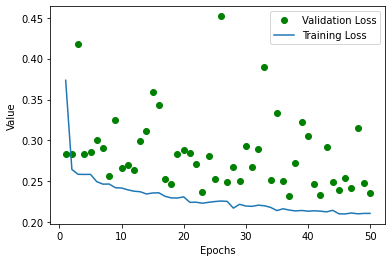

Final Training loss:  0.21093517541885376 
Final Training Accuracy:  0.8126026391983032
Final Validation loss:  0.23532864451408386 
Final Validation Accuracy:  0.7894737124443054


In [5]:
# Plot the validation and training loss
plt.plot(range(1, len(history_clasmodl3.history['val_loss']) + 1), history_clasmodl3.history['val_loss'], 'go', label = "Validation Loss")
plt.plot(range(1, len(history_clasmodl3.history['loss']) + 1), history_clasmodl3.history['loss'],label = "Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend()
plt.show()
# Final Values
print("Final Training loss: ",history_clasmodl3.history['loss'][-1],"\nFinal Training Accuracy: ", history_clasmodl3.history['accuracy'][-1])
print("Final Validation loss: ",history_clasmodl3.history['val_loss'][-1],"\nFinal Validation Accuracy: ", history_clasmodl3.history['val_accuracy'][-1])

## Predicting the Output

In [6]:
# Predicting the activation and inputting it alongside the targets
# into the predict_table 
from pandas.core.arrays.sparse import dtype
predict_labels = np.around(clasmodl3.predict(Xtst))
predict_table = pd.DataFrame(Xtst)
predict_table["activation"] = [predict_labels[0,:],predict_labels[1,:],predict_labels[2,:],predict_labels[3,:],predict_labels[4,:],predict_labels[5,:],predict_labels[6,:],predict_labels[7,:],predict_labels[8,:],predict_labels[9,:]]
predict_table["target"] = [one_hot_tst_labels[0,:],one_hot_tst_labels[1,:],one_hot_tst_labels[2,:],one_hot_tst_labels[3,:],one_hot_tst_labels[4,:],one_hot_tst_labels[5,:],one_hot_tst_labels[6,:],one_hot_tst_labels[7,:],one_hot_tst_labels[8,:],one_hot_tst_labels[9,:]]

# Checking which activations match their target i.e accuracy
check = np.empty((10,4), dtype=bool)
hits = []
for i in range(len(predict_labels)):
  check[i,:] = predict_labels[i,:] == one_hot_tst_labels[i,:] 
  if (np.count_nonzero(check[i,:]) ==4):
    hits.append("Hit")
  else:
    hits.append("Missed")
predict_table["accuracy"] = hits

# Renaming the columns of the table
predict_table.columns.values[0] = "f1"
predict_table.columns.values[1] = "f2"
predict_table.columns.values[2] = "f3"
predict_table.columns.values[3] = "f4"
predict_table.columns.values[4] = "f5"
predict_table.columns.values[5] = "f6"
predict_table.columns.values[6] = "f7"
predict_table.columns.values[7] = "f8"
predict_table.columns.values[8] = "f9"
predict_table.columns.values[9] = "f10"
predict_table.columns.values[10] = "f11"
predict_table.columns.values[11] = "f12"
display(predict_table)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,activation,target,accuracy
0,7.4,0.44,0.20,11.5,0.049,44.0,157.0,0.99800,3.27,0.44,9.000000,0.0,"[0.0, 1.0, 0.0, 0.0]","[0.0, 1.0, 0.0, 0.0]",Hit
1,6.5,0.23,0.36,16.3,0.038,43.0,133.0,0.99924,3.26,0.41,8.800000,0.0,"[0.0, 1.0, 0.0, 0.0]","[0.0, 1.0, 0.0, 0.0]",Hit
2,5.6,0.41,0.24,1.9,0.034,10.0,53.0,0.98815,3.32,0.50,13.500000,0.0,"[0.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0]",Missed
3,6.4,0.67,0.08,2.1,0.045,19.0,48.0,0.99490,3.49,0.49,11.400000,1.0,"[0.0, 1.0, 0.0, 0.0]","[0.0, 1.0, 0.0, 0.0]",Hit
4,6.8,0.18,0.37,1.6,0.055,47.0,154.0,0.99340,3.08,0.45,9.100000,0.0,"[0.0, 1.0, 0.0, 0.0]","[0.0, 1.0, 0.0, 0.0]",Hit
5,6.9,0.41,0.33,10.1,0.043,28.0,152.0,0.99680,3.20,0.52,9.400000,0.0,"[0.0, 1.0, 0.0, 0.0]","[0.0, 1.0, 0.0, 0.0]",Hit
6,5.9,0.32,0.33,2.1,0.027,35.0,138.0,0.98945,3.37,0.42,12.700000,0.0,"[0.0, 1.0, 0.0, 0.0]","[0.0, 1.0, 0.0, 0.0]",Hit
7,6.0,0.24,0.41,1.3,0.036,42.0,118.0,0.99018,3.04,0.64,11.733333,0.0,"[0.0, 1.0, 0.0, 0.0]","[0.0, 1.0, 0.0, 0.0]",Hit
8,7.3,0.48,0.32,2.1,0.062,31.0,54.0,0.99728,3.30,0.65,10.000000,1.0,"[0.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0]",Missed
9,7.4,0.24,0.22,10.7,0.042,26.0,81.0,0.99540,2.86,0.36,9.700000,0.0,"[0.0, 1.0, 0.0, 0.0]","[0.0, 1.0, 0.0, 0.0]",Hit
